Implementing Random Forest Regression model

Estimate and plot different error metrics (RMSE, MSE, MAE, Average Error) in a 20 runs of a Random Forest Regression model. ***Each runs has a different 20/80 test training split, and with the stratified data***

The point is that the estimation could be done for two different set of bins and for mode with and without overfitting reduction. So, the point is that it is possible to check the difference in estimated errors according to different set of bins and also possible to have comparison between reducedoverfitting model and overfitting model.

In [ ]:
%load_ext jupyter_black

In [ ]:
import random
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error

from utils import get_clean_dataset

In [ ]:
df = get_clean_dataset()

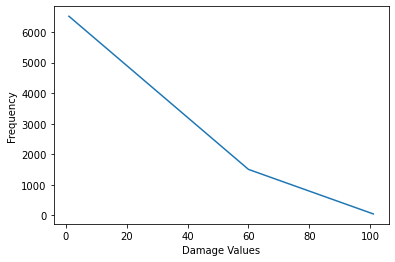

In [9]:
#The Old and New set of bins
bins2= [0, 1, 60, 101]
#bins2 = [0, 0.00009, 1, 10, 50, 101]
samples_per_bin2, binsP2 = np.histogram(df['DAM_perc_dmg'], bins=bins2)
plt.xlabel("Damage Values")
plt.ylabel("Frequency")
plt.plot(binsP2[1:],samples_per_bin2)

In [10]:
print(samples_per_bin2)
print(binsP2)

[6517 1506   50]
[  0   1  60 101]


In [11]:
bin_index2=np.digitize(df['DAM_perc_dmg'], bins=binsP2, right=True)

In [12]:
#df['DAM_perc_dmg'].value_counts(bins=binsP2)

In [13]:
y_input_strat=bin_index2

In [14]:
#the Beginning time to run the model 20 times
import datetime
now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time : 
2022-11-10 02:10:22


In [15]:
#Dropping highly correlated features which their correlation values are greater than 0.99.
features =[
    'HAZ_rainfall_Total', 
    'HAZ_rainfall_max_6h',
    'HAZ_rainfall_max_24h',
    'HAZ_v_max',
    'HAZ_v_max_3',
    'HAZ_dis_track_min',
    'GEN_landslide_per',
    'GEN_stormsurge_per',
    #'GEN_Bu_p_inSSA', 
    #'GEN_Bu_p_LS', 
    'GEN_Red_per_LSbldg',
    'GEN_Or_per_LSblg', 
    'GEN_Yel_per_LSSAb', 
    #'GEN_RED_per_SSAbldg',
    'GEN_OR_per_SSAbldg',
    'GEN_Yellow_per_LSbl',
    'TOP_mean_slope',
    'TOP_mean_elevation_m', 
    'TOP_ruggedness_stdev', 
    #'TOP_mean_ruggedness',
    #'TOP_slope_stdev', 
    'VUL_poverty_perc',
    'GEN_with_coast',
    'GEN_coast_length', 
    'VUL_Housing_Units',
    'VUL_StrongRoof_StrongWall', 
    'VUL_StrongRoof_LightWall',
    'VUL_StrongRoof_SalvageWall', 
    'VUL_LightRoof_StrongWall',
    'VUL_LightRoof_LightWall', 
    'VUL_LightRoof_SalvageWall',
    'VUL_SalvagedRoof_StrongWall',
    'VUL_SalvagedRoof_LightWall',
    'VUL_SalvagedRoof_SalvageWall', 
    'VUL_vulnerable_groups',
    'VUL_pantawid_pamilya_beneficiary']
    
# Split X and y from dataframe features
X = df[features]
display(X.columns)
y = df["DAM_perc_dmg"]

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

#Define empty lists for results
train_RMSE_list=[]
test_RMSE_list=[]

train_MSE_list=[]
test_MSE_list=[]

train_MAE_list=[]
test_MAE_list=[]

train_AVE_list=[]
test_AVE_list=[]

for i in range(20): 
    X_train, X_test, y_train, y_test = train_test_split(X_scaled,df['DAM_perc_dmg'], stratify=y_input_strat, test_size=0.2)

    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    
    #Random Forest
    #rf = RandomForestRegressor(max_depth=None, n_estimators=100, min_samples_split=8,min_samples_leaf=5)
    
    #Random Forest Reduced Overfitting
    rf = RandomForestRegressor(max_depth=None, n_estimators=100, min_samples_split=8,min_samples_leaf=5, max_samples=0.7)
    
    rf_model=rf.fit(X_train, y_train)
    
    
    X2 = sm.add_constant(X_train)
    est = sm.OLS(y_train, X2)
    est2 = est.fit()
    print(est2.summary())

    
    y_pred_train = rf.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    mx_train = max_error(y_train, y_pred_train)
    me_train = (y_pred_train - y_train).sum()/len(y_train)

    y_pred = rf.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mx = max_error(y_test, y_pred)
    me = (y_pred - y_test).sum()/len(y_test)

    print('----- Test  ------')
    print(f'Mean absolute error: {mae:.2f}')
    print(f'Mean squared error: {mse:.2f}')
    print(f'Root mean squared error: {rmse:.2f}')
    print(f'Max error: {mx:.2f}')
    print(f"Average Error: {me:.2f}")

    print('---- Training -----')
    print(f'Mean absolute error: {mae_train:.2f}')
    print(f'Mean squared error: {mse_train:.2f}')
    print(f'Root mean squared error: {rmse_train:.2f}')
    print(f'Max error: {mx_train:.2f}')
    print(f"Average Error: {me_train:.2f}")
   
    
    score = rf.score(X_train, y_train)  
    print("Training score coefficient of determination for Random Forest R^2: %.3f " % (score))
    
    test_RMSE_list.append(rmse)
    train_RMSE_list.append(rmse_train)
    
    test_MSE_list.append(mse)
    train_MSE_list.append(mse_train)
    
    test_MAE_list.append(mae)
    train_MAE_list.append(mae_train)
    
    test_AVE_list.append(me)
    train_AVE_list.append(me_train)
    
print(test_RMSE_list)    
print(train_RMSE_list) 

print(test_MSE_list)    
print(train_MSE_list) 

print(test_MAE_list)    
print(train_MAE_list)
    
    

Index(['HAZ_rainfall_Total', 'HAZ_rainfall_max_6h', 'HAZ_rainfall_max_24h',
       'HAZ_v_max', 'HAZ_v_max_3', 'HAZ_dis_track_min', 'GEN_landslide_per',
       'GEN_stormsurge_per', 'GEN_Red_per_LSbldg', 'GEN_Or_per_LSblg',
       'GEN_Yel_per_LSSAb', 'GEN_OR_per_SSAbldg', 'GEN_Yellow_per_LSbl',
       'TOP_mean_slope', 'TOP_mean_elevation_m', 'TOP_ruggedness_stdev',
       'VUL_poverty_perc', 'GEN_with_coast', 'GEN_coast_length',
       'VUL_Housing_Units', 'VUL_StrongRoof_StrongWall',
       'VUL_StrongRoof_LightWall', 'VUL_StrongRoof_SalvageWall',
       'VUL_LightRoof_StrongWall', 'VUL_LightRoof_LightWall',
       'VUL_LightRoof_SalvageWall', 'VUL_SalvagedRoof_StrongWall',
       'VUL_SalvagedRoof_LightWall', 'VUL_SalvagedRoof_SalvageWall',
       'VUL_vulnerable_groups', 'VUL_pantawid_pamilya_beneficiary'],
      dtype='object')

(6458, 31) (6458,)
(1615, 31) (1615,)
                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     182.8
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:10:54   Log-Likelihood:                -21429.
No. Observations:                6458   AIC:                         4.292e+04
Df Residuals:                    6426   BIC:                         4.314e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     181.2
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:11:07   Log-Likelihood:                -21510.
No. Observations:                6458   AIC:                         4.308e+04
Df Residuals:                    6426   BIC:                         4.330e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4575      0.084     29.104      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     175.7
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:11:19   Log-Likelihood:                -21524.
No. Observations:                6458   AIC:                         4.311e+04
Df Residuals:                    6426   BIC:                         4.333e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4661      0.085     29.141      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     178.2
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:11:32   Log-Likelihood:                -21504.
No. Observations:                6458   AIC:                         4.307e+04
Df Residuals:                    6426   BIC:                         4.329e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4562      0.084     29.117      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     193.2
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:11:44   Log-Likelihood:                -21395.
No. Observations:                6458   AIC:                         4.285e+04
Df Residuals:                    6426   BIC:                         4.307e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4455      0.083     29.483      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     176.4
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:11:57   Log-Likelihood:                -21619.
No. Observations:                6458   AIC:                         4.330e+04
Df Residuals:                    6426   BIC:                         4.352e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4907      0.086     29.010      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     168.8
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:12:09   Log-Likelihood:                -21527.
No. Observations:                6458   AIC:                         4.312e+04
Df Residuals:                    6426   BIC:                         4.334e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4294      0.085     28.697      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     180.7
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:12:22   Log-Likelihood:                -21528.
No. Observations:                6458   AIC:                         4.312e+04
Df Residuals:                    6426   BIC:                         4.334e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4864      0.085     29.369      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     173.7
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:12:34   Log-Likelihood:                -21423.
No. Observations:                6458   AIC:                         4.291e+04
Df Residuals:                    6426   BIC:                         4.313e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4026      0.083     28.837      0.0

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     183.5
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:12:47   Log-Likelihood:                -21495.
No. Observations:                6458   AIC:                         4.305e+04
Df Residuals:                    6426   BIC:                         4.327e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4722      0.084     29.354      0.0

In [16]:
#the End time of running the model 20 times
now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time : 
2022-11-10 02:12:53


stdev_AVERAGE_test: 0.13
stdev_AVERAGE_train: 0.01
mean_AVERAGE_test: 0.07
mean_AVERAGE_train: 0.04


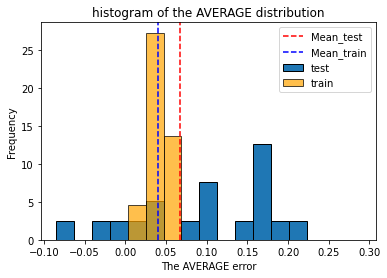

In [17]:
#Average Error

m_test_ave = statistics.mean(test_AVE_list)
plt.axvline(m_test_ave, color='red', linestyle='dashed')
plt.hist(test_AVE_list, bins=np.arange(-0.085,0.3,0.022), edgecolor='k', histtype ='bar', density=True)
sd_test_ave = statistics.stdev(test_AVE_list)

m_train_ave = statistics.mean(train_AVE_list)
plt.axvline(m_train_ave, color='b', linestyle='dashed')
plt.hist(train_AVE_list, color='orange', edgecolor='k', bins=np.arange(-0.085,0.3,0.022), histtype ='bar', density=True, alpha=0.7)
sd_train_ave = statistics.stdev(train_AVE_list)

print(f'stdev_AVERAGE_test: {sd_test_ave:.2f}')
print(f'stdev_AVERAGE_train: {sd_train_ave:.2f}')

print(f'mean_AVERAGE_test: {m_test_ave:.2f}')
print(f'mean_AVERAGE_train: {m_train_ave:.2f}')

#create legend
labels= ["Mean_test","Mean_train","test","train"]
plt.legend(labels)

plt.xlabel('The AVERAGE error')
plt.ylabel('Frequency')
plt.title('histogram of the AVERAGE distribution')
plt.show()

stdev_MAE_test: 0.09
stdev_MAE_train: 0.03
mean_MAE_test: 1.91
mean_MAE_train: 1.38


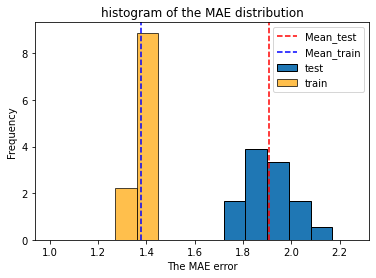

In [18]:
#MAE

m_test_mae = statistics.mean(test_MAE_list)
plt.axvline(m_test_mae, color='red', linestyle='dashed')
plt.hist(test_MAE_list, bins=np.arange(1.0,2.3,0.09), edgecolor='k', histtype ='bar', density=True)
sd_test_mae = statistics.stdev(test_MAE_list)
#plt.axvline(m+sd, color='b', linestyle='dashed')
#plt.axvline(m-sd, color='b', linestyle='dashed')


m_train_mae = statistics.mean(train_MAE_list)
plt.axvline(m_train_mae, color='b', linestyle='dashed')
plt.hist(train_MAE_list, color='orange', edgecolor='k', bins=np.arange(1.0,2.3,0.09), histtype ='bar', density=True, alpha=0.7)

sd_train_mae = statistics.stdev(train_MAE_list)
#plt.axvline(m+sd, color='y', linestyle='dashed')
#plt.axvline(m-sd, color='y', linestyle='dashed')

print(f'stdev_MAE_test: {sd_test_mae:.2f}')
print(f'stdev_MAE_train: {sd_train_mae:.2f}')

print(f'mean_MAE_test: {m_test_mae:.2f}')
print(f'mean_MAE_train: {m_train_mae:.2f}')


#create legend
labels= ["Mean_test","Mean_train","test","train"]
plt.legend(labels)

plt.xlabel('The MAE error')
plt.ylabel('Frequency')
plt.title('histogram of the MAE distribution')
plt.show()

stdev_RMSE_test: 0.37
stdev_RMSE_train: 0.08
mean_RMSE_test: 5.95
mean_RMSE_train: 4.45


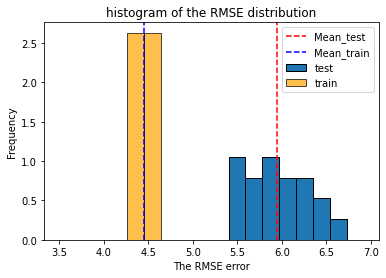

In [19]:
#RMSE

m_test_rmse = statistics.mean(test_RMSE_list)
plt.axvline(m_test_rmse, color='red', linestyle='dashed')
plt.hist(test_RMSE_list, bins=np.arange(3.5,7.0,0.19), #color='b',
         edgecolor='k', histtype ='bar', density=True, #alpha=0.5
        )
sd_test_rmse = statistics.stdev(test_RMSE_list)
#plt.axvline(m+sd, color='b', linestyle='dashed')
#plt.axvline(m-sd, color='b', linestyle='dashed')


m_train_rmse = statistics.mean(train_RMSE_list)
plt.axvline(m_train_rmse, color='b', linestyle='dashed')
plt.hist(train_RMSE_list, bins=np.arange(3.5,7.0,0.19), color='orange', edgecolor='k', histtype ='bar', density=True, alpha=0.7)

sd_train_rmse = statistics.stdev(train_RMSE_list)
#plt.axvline(m+sd, color='y', linestyle='dashed')
#plt.axvline(m-sd, color='y', linestyle='dashed')

print(f'stdev_RMSE_test: {sd_test_rmse:.2f}')
print(f'stdev_RMSE_train: {sd_train_rmse:.2f}')

print(f'mean_RMSE_test: {m_test_rmse:.2f}')
print(f'mean_RMSE_train: {m_train_rmse:.2f}')

#create legend
labels= ["Mean_test","Mean_train","test","train"]
plt.legend(labels)

plt.xlabel('The RMSE error')
plt.ylabel('Frequency')
plt.title('histogram of the RMSE distribution')
plt.show()

stdev_MSE_test: 4.44
stdev_MSE_train: 0.68
mean_MSE_test: 35.53
mean_MSE_train: 19.82


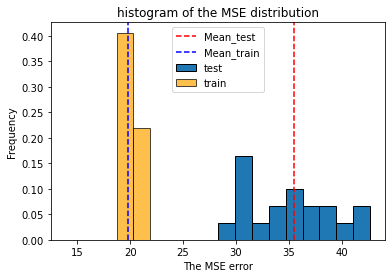

In [20]:
#MSE

m_test_mse = statistics.mean(test_MSE_list)
plt.axvline(m_test_mse, color='red', linestyle='dashed')
plt.hist(test_MSE_list, bins=np.arange(13.9,43.2,1.6), #color='b',
         edgecolor='k', histtype ='bar', density=True)

m_train_mse = statistics.mean(train_MSE_list)
plt.axvline(m_train_mse, color='b', linestyle='dashed')
plt.hist(train_MSE_list, color='orange', bins=np.arange(13.9,43.2,1.6), edgecolor='k', histtype ='bar', density=True, alpha=0.7)

sd_train_mse = statistics.stdev(train_MSE_list)
sd_test_mse = statistics.stdev(test_MSE_list)

print(f'stdev_MSE_test: {sd_test_mse:.2f}')
print(f'stdev_MSE_train: {sd_train_mse:.2f}')

print(f'mean_MSE_test: {m_test_mse:.2f}')
print(f'mean_MSE_train: {m_train_mse:.2f}')


#create legend
colors_2 = ["lime", "blue"]
labels_2= ["test","train"]
#plt.legend(labels_2)


#create legend
colors = ["tan", "red"]
labels= ["Mean_test","Mean_train","test","train"]
plt.legend(labels)

plt.xlabel('The MSE error')
plt.ylabel('Frequency')
plt.title('histogram of the MSE distribution')
plt.show()

In [21]:
###Codes in the following cells displays the estimated errors in a single run of Random Forest Regression Model.

In [22]:
X = df[features]
display(X.columns)
y = df["DAM_perc_dmg"]

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,df['DAM_perc_dmg'], stratify=y_input_strat, 
                                                    test_size=0.2) 


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


Index(['HAZ_rainfall_Total', 'HAZ_rainfall_max_6h', 'HAZ_rainfall_max_24h',
       'HAZ_v_max', 'HAZ_v_max_3', 'HAZ_dis_track_min', 'GEN_landslide_per',
       'GEN_stormsurge_per', 'GEN_Red_per_LSbldg', 'GEN_Or_per_LSblg',
       'GEN_Yel_per_LSSAb', 'GEN_OR_per_SSAbldg', 'GEN_Yellow_per_LSbl',
       'TOP_mean_slope', 'TOP_mean_elevation_m', 'TOP_ruggedness_stdev',
       'VUL_poverty_perc', 'GEN_with_coast', 'GEN_coast_length',
       'VUL_Housing_Units', 'VUL_StrongRoof_StrongWall',
       'VUL_StrongRoof_LightWall', 'VUL_StrongRoof_SalvageWall',
       'VUL_LightRoof_StrongWall', 'VUL_LightRoof_LightWall',
       'VUL_LightRoof_SalvageWall', 'VUL_SalvagedRoof_StrongWall',
       'VUL_SalvagedRoof_LightWall', 'VUL_SalvagedRoof_SalvageWall',
       'VUL_vulnerable_groups', 'VUL_pantawid_pamilya_beneficiary'],
      dtype='object')

(6458, 31) (6458,)
(1615, 31) (1615,)


In [23]:
# create an Random Forest regression model
#rf = RandomForestRegressor(max_depth=None, n_estimators=100, min_samples_split=8,min_samples_leaf=5)

#RandomForest Reduced Overfitting
rf = RandomForestRegressor(max_depth=None, n_estimators=100, min_samples_split=8,min_samples_leaf=5, max_samples=0.7)

rf_model=rf.fit(X_train, y_train)

In [24]:
import statsmodels.api as sm
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           DAM_perc_dmg   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     176.8
Date:                Thu, 10 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:14:09   Log-Likelihood:                -21536.
No. Observations:                6458   AIC:                         4.314e+04
Df Residuals:                    6426   BIC:                         4.335e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4773      0.085     29.218      0.0

In [25]:
y_pred_train = rf.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mx_train = max_error(y_train, y_pred_train)
me_train = (y_pred_train - y_train).sum()/len(y_train)

y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mx = max_error(y_test, y_pred)
me = (y_pred - y_test).sum()/len(y_test)

print('----- Test  ------')
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'Max error: {mx:.2f}')
print(f"Average Error: {me:.2f}")

print('---- Training -----')
print(f'Mean absolute error: {mae_train:.2f}')
print(f'Mean squared error: {mse_train:.2f}')
print(f'Root mean squared error: {rmse_train:.2f}')
print(f'Max error: {mx_train:.2f}')
print(f"Average Error: {me_train:.2f}")

----- Test  ------
Mean absolute error: 1.84
Mean squared error: 33.77
Root mean squared error: 5.81
Max error: 77.18
Average Error: 0.10
---- Training -----
Mean absolute error: 1.40
Mean squared error: 19.96
Root mean squared error: 4.47
Max error: 77.32
Average Error: 0.04


In [26]:
score = rf.score(X_train, y_train)  
print("Training score coefficient of determination for Random Forest R^2: %.3f " % (score))

Training score coefficient of determination for Random Forest R^2: 0.767 
